In [68]:
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np

In [69]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0f72c3de9a7a4f7393cd4e6920ff54a5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2BMyH7881xc88eM5x9RpXWRd5k1SkDmgHbtuXbYUUw86',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0f72c3de9a7a4f7393cd4e6920ff54a5.get_object(Bucket='windenen-donotdelete-pr-pwredmcvuwo9jl',Key='winddirtime.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataframe = pd.read_csv(body, index_col='Date/Time')
dataframe.head()


,Wind Direction (°)
Date/Time,
01 01 2018 00:00,259.994904
01 01 2018 00:10,268.641113
01 01 2018 00:20,272.564789
01 01 2018 00:30,271.258087
01 01 2018 00:40,265.674286


In [70]:

dataset = dataframe.values
dataset.shape

(50530, 1)

In [71]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

33855 16675


In [72]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [73]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [74]:
len(testX)

16673

In [75]:
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

In [76]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=15, batch_size=2, verbose=2)

Epoch 1/15
 - 72s - loss: 1931.0906
Epoch 2/15
 - 72s - loss: 1682.8943
Epoch 3/15
 - 72s - loss: 1677.9550
Epoch 4/15
 - 72s - loss: 1675.9902
Epoch 5/15
 - 72s - loss: 1675.3400
Epoch 6/15
 - 71s - loss: 1674.4719
Epoch 7/15
 - 72s - loss: 1672.0145
Epoch 8/15
 - 72s - loss: 1673.3174
Epoch 9/15
 - 72s - loss: 1671.7313
Epoch 10/15
 - 72s - loss: 1672.6643
Epoch 11/15
 - 72s - loss: 1670.7426
Epoch 12/15
 - 72s - loss: 1671.9870
Epoch 13/15
 - 72s - loss: 1670.6325
Epoch 14/15
 - 73s - loss: 1669.9431
Epoch 15/15
 - 72s - loss: 1673.0424


In [77]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 1669.19 MSE (40.86 RMSE)
Test Score: 1339.64 MSE (36.60 RMSE)


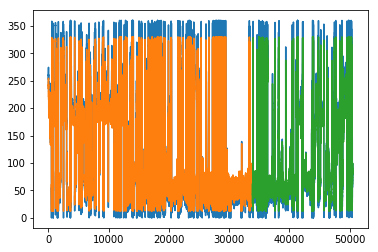

In [78]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [84]:
model.predict([14.32318974])

array([[24.944517]], dtype=float32)

In [80]:
trainX

array([[259.99490356],
       [268.64111328],
       [272.56478882],
       ...,
       [ 13.12718964],
       [ 11.18043041],
       [ 14.32318974]])

In [50]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [51]:
wml_credentials = {
  "apikey": "CXLCtQJbDrv_EhkeRWF0aDi8-KYTD8F-Qtbvw1UBviRK",
  "iam_apikey_description": "Auto-generated for key bc1b2f1c-6f03-434c-a173-c0bf5c6e63d4",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/5c7a0ba5bd374e83ab9e7657cfba8e4b::serviceid:ServiceId-5ff03e45-f7b3-485c-b8bf-8d8517ce8724",
  "instance_id": "444b895f-f348-4cee-a911-3aaa83c3554f",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [52]:
client= WatsonMachineLearningAPIClient(wml_credentials)

In [53]:
metadata = {
        client.repository.ModelMetaNames.AUTHOR_NAME: 'Mohamed Haneef',
        client.repository.ModelMetaNames.AUTHOR_EMAIL: 'haneefhnf555@gmail.com',
        client.repository.ModelMetaNames.NAME: 'Prediction of Wind Speed',
        client.repository.ModelMetaNames.FRAMEWORK_NAME: 'tensorflow',
        client.repository.ModelMetaNames.FRAMEWORK_VERSION: '1.15',
        client.repository.ModelMetaNames.FRAMEWORK_LIBRARIES:[{'name':'keras', 'version':'2.2.4'}]
}


In [54]:
model_result_path = 'speed_prediction.h5'
model.save(model_result_path)


In [55]:
!tar -zcvf speed_prediction.tgz speed_prediction.h5


speed_prediction.h5


In [56]:
stored_data = client.repository.store_model(model='speed_prediction.tgz' ,meta_props=metadata, training_data =trainX, training_target=trainY)


In [57]:
stored_data


{'metadata': {'guid': 'b5948f1f-8a78-4b11-9945-a2f51788149d',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/444b895f-f348-4cee-a911-3aaa83c3554f/published_models/b5948f1f-8a78-4b11-9945-a2f51788149d',
  'created_at': '2020-07-11T18:22:35.692Z',
  'modified_at': '2020-07-11T18:22:35.745Z'},
 'entity': {'runtime_environment': 'None Provided',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/444b895f-f348-4cee-a911-3aaa83c3554f/published_models/b5948f1f-8a78-4b11-9945-a2f51788149d/learning_configuration',
  'author': {'name': 'Mohamed Haneef'},
  'name': 'Prediction of Wind Speed',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/444b895f-f348-4cee-a911-3aaa83c3554f/published_models/b5948f1f-8a78-4b11-9945-a2f51788149d/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/444b895f-f348-4cee-a911-3aaa83c3554f/published_models/b5948f1f-8a78-4b11-9945-a2f51788149d/feedback',
  'latest_

In [58]:
guid = client.repository.get_model_uid(stored_data)


In [59]:
guid

'b5948f1f-8a78-4b11-9945-a2f51788149d'

In [60]:
model_deployment_details = client.deployments.create(guid)



#######################################################################################

Synchronous deployment creation for uid: 'b5948f1f-8a78-4b11-9945-a2f51788149d' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='b4c959f5-a0f2-475b-ac62-95f67fcce1b1'
------------------------------------------------------------------------------------------------




In [61]:
scoring_endpoint = client.deployments.get_scoring_url(model_deployment_details)

In [62]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/444b895f-f348-4cee-a911-3aaa83c3554f/deployments/b4c959f5-a0f2-475b-ac62-95f67fcce1b1/online'

In [67]:
a= np.array([[5.31133604]])

model.predict(a)


array([[5.4303427]], dtype=float32)

In [65]:
trainX

array([[5.31133604],
       [5.67216682],
       [5.2160368 ],
       ...,
       [6.90546894],
       [7.13509083],
       [8.17819881]])

In [ ]:
array([[5.31133604],
       [5.67216682],
       [5.2160368 ]])